# Dry Beas Classification

**`Author : Amira Adel Fouda`**
**`Date   : 04 - 05 - 2022`**

**In this Script, I will develop a Python program that is able to classify Dry beans with supervised learning algorithms**

## Dataset Information

Given a set of features extracted from the shape of the beans in images and it's required to predict the class of a bean given some features about its shape. There are 7 bean types in this dataset.

**Data fields**
- Area - (A), The area of a bean zone and the number of pixels within its boundaries.
- Perimeter - (P), Bean circumference is defined as the length of its border.
- MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio - (K), Defines the relationship between L and l.
- Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.
- ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area.
- Extent - (Ex), The ratio of the pixels in the bounding box to the bean area.
- Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness - (R), Calculated with the following formula: (4piA)/(P^2)
- Compactness - (CO), Measures the roundness of an object: Ed/L
- ShapeFactor1 - (SF1)
- ShapeFactor2 - (SF2)
- ShapeFactor3 - (SF3)
- ShapeFactor4 - (SF4)
- Class - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

<img src="https://www.thespruceeats.com/thmb/eeIti36pfkoNBaipXrTHLjIv5YA=/1888x1416/smart/filters:no_upscale()/DriedBeans-56f6c2c43df78c78418c3b46.jpg">

For more information on the attributes visit [here](https://www.kaggle.com/code/josegarban/dry-beans-classification/data)

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

**Importing Data and show some of data**

In [ ]:
data = pd.read_csv("Dry_Bean_Dataset.csv/Dry_Bean_Dataset.csv")
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645884.00,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620134.00,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


**Information about data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

**From above we find the features are all numerical but `Class` is object**

**No Nullable Data**

**Show Statistic Summary** 

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,2.546160e+05
Perimeter,13611.0,772910.982959,323884.750766,553.600000,676995.500000,772273.000000,955500.000000,1.921685e+06
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,7.388602e+02
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,4.601985e+02
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306e+00
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,9.114230e-01
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,2.632610e+05
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,5.693744e+02
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,8.661946e-01
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,9.946775e-01


**Show count the frequency for each class**

In [ ]:
data["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

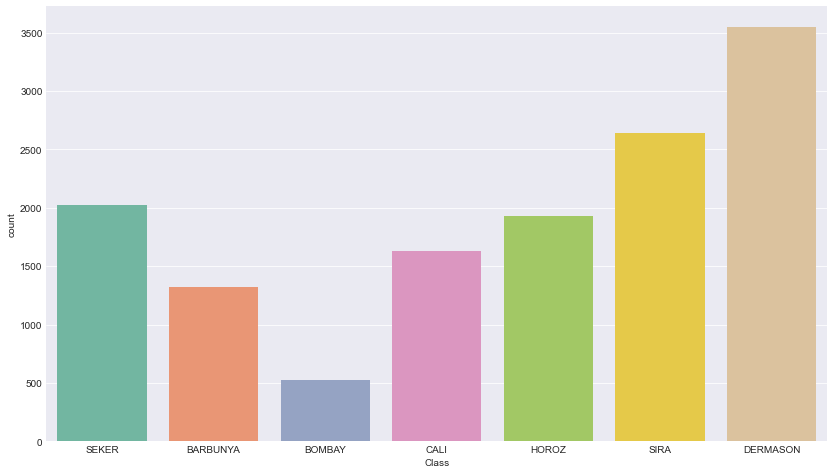

In [ ]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-darkgrid')
sns.countplot(data.Class,palette='Set2')
plt.show()

**Number of instancs for each class , Dermason has the highest number.**

**Show correlation of data with Heatmap**

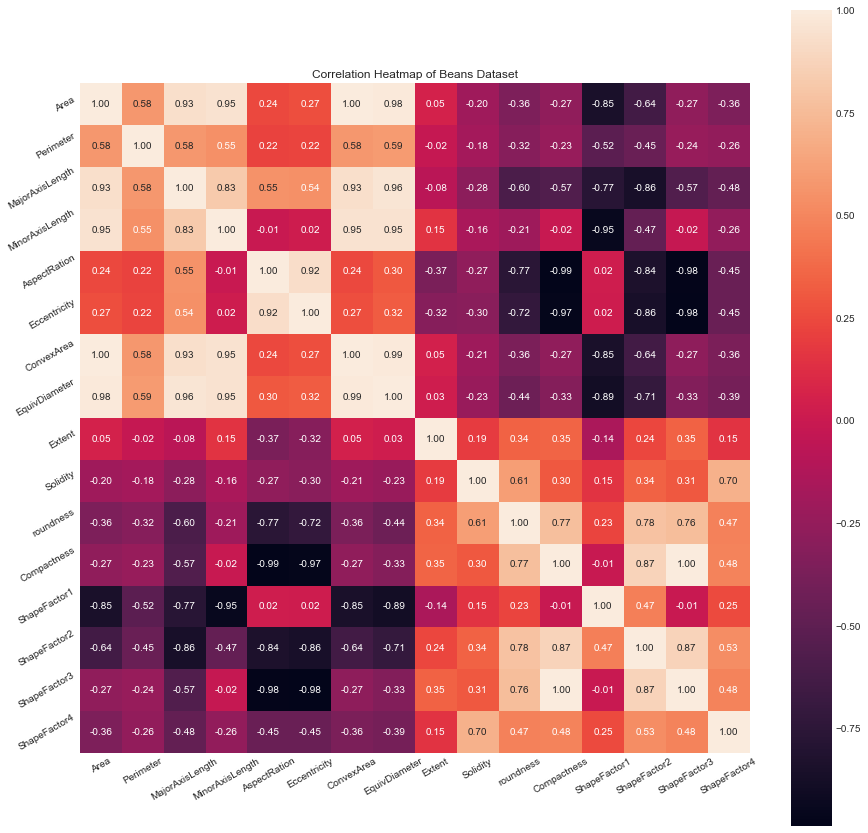

In [ ]:
plt.figure(figsize=(15,15))
plt.title("Correlation Heatmap of Beans Dataset")
fig = sns.heatmap(data.corr(),square=True,annot=True,fmt='.2f',linecolor='black')
fig.set_xticklabels(fig.get_xticklabels(),rotation=30)
fig.set_yticklabels(fig.get_yticklabels(),rotation=30)
plt.show()

From this correlation matrix we can exctract features that are strongly correlated like :

- Area
- Perimeter
- MajorAxisLength
- MinorAxisLength
- ConvexArea
- EquivDiameter
- ShapeFactor1

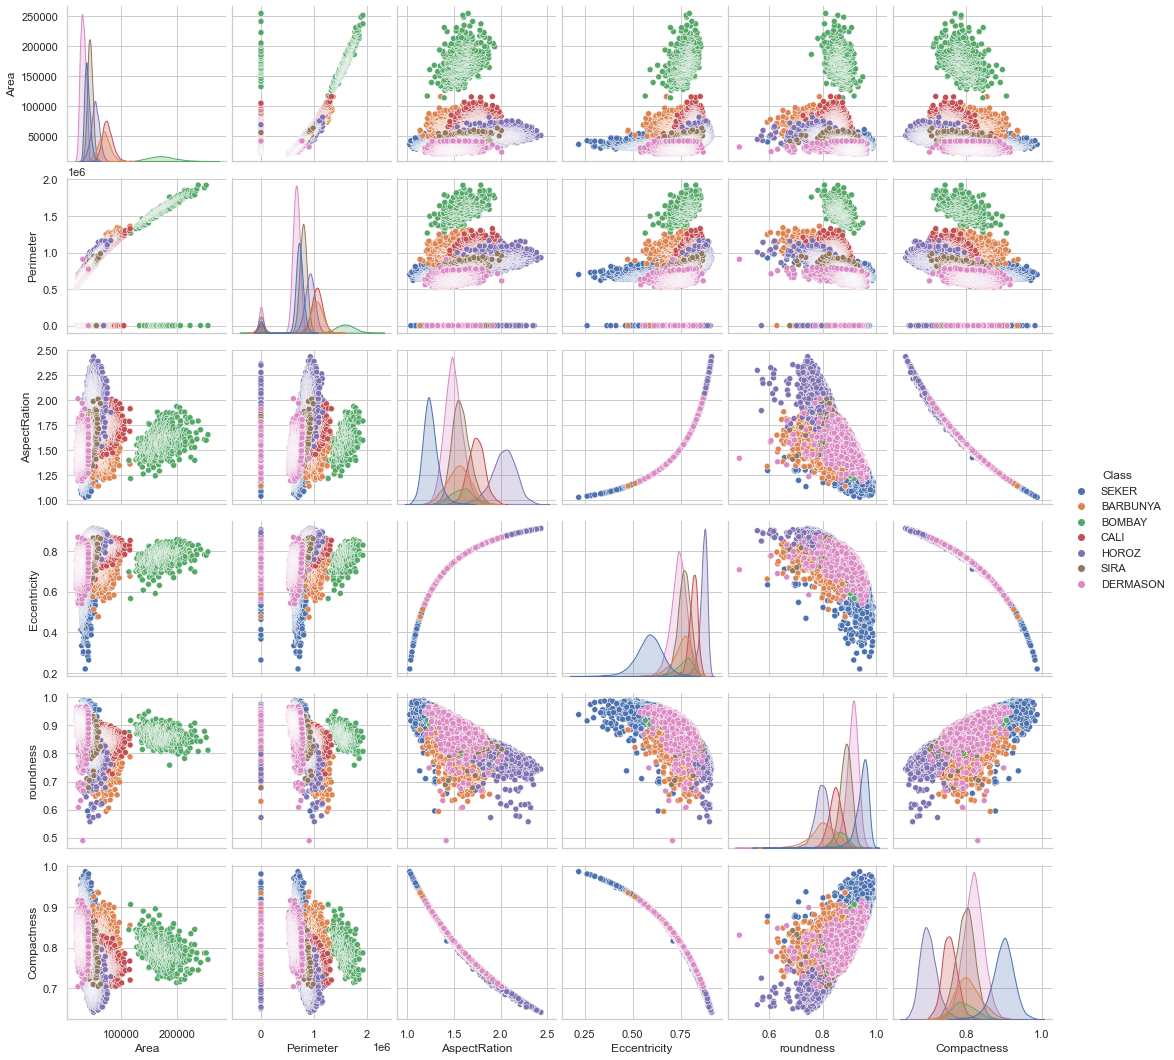

In [ ]:
Strongly_corr_features = data[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","Class"]]
Strongly_corr_features.head()
sns.set_theme(style="whitegrid")
sns.pairplot(Strongly_corr_features, hue="Class")

**From the graph above, Linear and log relations can be detected**

**Splitting the Data into Features and Label** 

In [ ]:
features = data.drop(['Class'],axis=1)
label = data.Class

**Feature Importance**

In [ ]:
model = ExtraTreesClassifier().fit(features,label)
print(model.feature_importances_)

[0.07283736 0.03530167 0.06843303 0.07541424 0.08299227 0.06266436
 0.06945561 0.08378873 0.01384867 0.01894817 0.06216828 0.09084773
 0.08822972 0.07314623 0.07163532 0.0302886 ]


<AxesSubplot:>

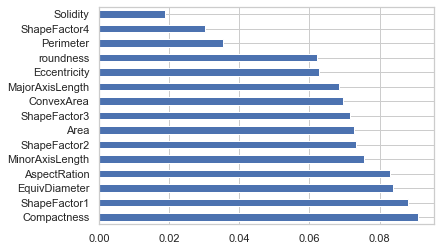

In [ ]:
feat_imp = pd.Series(model.feature_importances_, index=features.columns)
feat_imp.nlargest(15).plot(kind='barh')

**Make train-test spilt** 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=0)

**Applaying StanderScaler feature scalling**

In [ ]:
X_train = StandardScaler().fit_transform(X_train)
X_test  = StandardScaler().fit_transform(X_test)

**Build and Train Support Vector Machine  Classifier**

In [ ]:
svmc = svm.SVC(gamma=0.14, random_state=0)
svmc.fit(X_train,y_train)

SVC(gamma=0.14, random_state=0)

**Display Result in confusion Matrix**

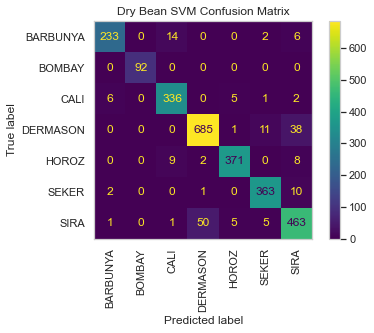

In [ ]:
plot_confusion_matrix(svmc,X_test,y_test)
plt.xticks(rotation=90)
plt.title("Dry Bean SVM Confusion Matrix")
plt.grid(False)
plt.show()

**Building classification report for the results from the SVM classifier**

In [ ]:
predSVM = svmc.predict(X_test)
repoSVM = classification_report(y_test, predSVM,output_dict=True)
repoSVM_df = pd.DataFrame(repoSVM).transpose()
repoSVM_df

,precision,recall,f1-score,support
BARBUNYA,0.962810,0.913725,0.937626,255.000000
BOMBAY,1.000000,1.000000,1.000000,92.000000
CALI,0.933333,0.960000,0.946479,350.000000
DERMASON,0.928184,0.931973,0.930075,735.000000
HOROZ,0.971204,0.951282,0.961140,390.000000
SEKER,0.950262,0.965426,0.957784,376.000000
SIRA,0.878558,0.881905,0.880228,525.000000
accuracy,0.933896,0.933896,0.933896,0.933896
macro avg,0.946336,0.943473,0.944762,2723.000000
weighted avg,0.934157,0.933896,0.933918,2723.000000
